In [179]:
import pandas as pd
import numpy as np
import requests
import time
import json
import prettytable
import matplotlib.pyplot as plt


#from api_keys import bls_key

headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LNS12024887','LNS12000089', 'LNS12000091', 'LNS12000093', 'LNU02000095', 'LNU02000097'],"startyear":"2009", "endyear":"2019"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
            'if M01 <= period <= M12:'
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()
    


#year = []
#periodName = []
#employed_16_24 = []
#epmployed_25_34 = []
#employed_35_44 = []
#employed_45_54 = []
#employed_55_64 = []
#employed_65 = []



In [47]:
json_data


{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 393,
 'message': ['Year range has been reduced to the system-allowed limit of 10 years.'],
 'Results': {'series': [{'seriesID': 'LNS12024887',
    'data': [{'year': '2018',
      'period': 'M12',
      'periodName': 'December',
      'value': '19111',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M11',
      'periodName': 'November',
      'value': '19164',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M10',
      'periodName': 'October',
      'value': '19156',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M09',
      'periodName': 'September',
      'value': '19130',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M08',
      'periodName': 'August',
      'value': '18721',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M07',
      'periodName': 'July',
      'value': '19247',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M06',

In [81]:

df = pd.DataFrame(json_data['Results'])
df.head(10)

,series
0,"{'seriesID': 'LNS12024887', 'data': [{'year': ..."
1,"{'seriesID': 'LNS12000089', 'data': [{'year': ..."
2,"{'seriesID': 'LNS12000091', 'data': [{'year': ..."
3,"{'seriesID': 'LNS12000093', 'data': [{'year': ..."
4,"{'seriesID': 'LNU02000095', 'data': [{'year': ..."
5,"{'seriesID': 'LNU02000097', 'data': [{'year': ..."


In [82]:
df.iloc[0,0]

{'seriesID': 'LNS12024887',
 'data': [{'year': '2018',
   'period': 'M12',
   'periodName': 'December',
   'value': '19111',
   'footnotes': [{}]},
  {'year': '2018',
   'period': 'M11',
   'periodName': 'November',
   'value': '19164',
   'footnotes': [{}]},
  {'year': '2018',
   'period': 'M10',
   'periodName': 'October',
   'value': '19156',
   'footnotes': [{}]},
  {'year': '2018',
   'period': 'M09',
   'periodName': 'September',
   'value': '19130',
   'footnotes': [{}]},
  {'year': '2018',
   'period': 'M08',
   'periodName': 'August',
   'value': '18721',
   'footnotes': [{}]},
  {'year': '2018',
   'period': 'M07',
   'periodName': 'July',
   'value': '19247',
   'footnotes': [{}]},
  {'year': '2018',
   'period': 'M06',
   'periodName': 'June',
   'value': '19160',
   'footnotes': [{}]},
  {'year': '2018',
   'period': 'M05',
   'periodName': 'May',
   'value': '19139',
   'footnotes': [{}]},
  {'year': '2018',
   'period': 'M04',
   'periodName': 'April',
   'value': '19227

In [126]:
df2 = pd.DataFrame(columns=df.columns)
df2_index = 0

df_list = []
for index, row in df.iterrows():
    row_data = row["series"]['data']
    test_df = pd.DataFrame(row_data)
    test_df["index"] = index
    df_list.append(test_df)
#    for year_data in row_data:
#       print(year_data)
#       one_row['series'] = list_value
#        df2.loc[df2_index] = one_row
#        df2_index += 1

final_df = pd.concat(df_list)
final_df.head(30)
# drop footnotes
final_df = final_df.drop('footnotes', axis=1)

In [127]:

final_df.tail()
final_df.info()
#value as sgring change to integer
final_df['value'] = final_df['value'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 119
Data columns (total 5 columns):
year          720 non-null object
period        720 non-null object
periodName    720 non-null object
value         720 non-null object
index         720 non-null int64
dtypes: int64(1), object(4)
memory usage: 33.8+ KB


In [161]:
#final_df.set_index(['year', 'period', 'periodName', 'index'], drop=True).unstack('index')
x = final_df.pivot_table(values = 'value', index = ['year', 'period', 'periodName'], columns = 'index')
#x['year'] = x.index.name['year']
x

index                       0      1      2      3      4      5
year period periodName                                          
2009 M01    January     18287  30438  32274  33942  20918   6130
     M02    February    18300  30295  32052  33867  21003   5966
     M03    March       18067  30170  31726  33773  20945   6055
     M04    April       18092  30082  31734  33801  21052   6034
     M05    May         17817  29924  31639  33683  21182   6132
...                       ...    ...    ...    ...    ...    ...
2018 M08    August      18721  35352  32655  32322  26578   9687
     M09    September   19130  35511  32501  32320  26709   9933
     M10    October     19156  35693  32857  32343  26828   9925
     M11    November    19164  35672  32796  32376  26855  10046
     M12    December    19111  35689  32881  32263  26910   9951

[120 rows x 6 columns]

In [165]:
x = x.reset_index()
x

index,index,year,period,periodName,0,1,2,3,4,5
0,0,2009,M01,January,18287,30438,32274,33942,20918,6130
1,1,2009,M02,February,18300,30295,32052,33867,21003,5966
2,2,2009,M03,March,18067,30170,31726,33773,20945,6055
3,3,2009,M04,April,18092,30082,31734,33801,21052,6034
4,4,2009,M05,May,17817,29924,31639,33683,21182,6132
...,...,...,...,...,...,...,...,...,...,...
115,115,2018,M08,August,18721,35352,32655,32322,26578,9687
116,116,2018,M09,September,19130,35511,32501,32320,26709,9933
117,117,2018,M10,October,19156,35693,32857,32343,26828,9925
118,118,2018,M11,November,19164,35672,32796,32376,26855,10046


In [164]:
x.to_csv("jobs_age_df.csv", index = False)

In [169]:
job_age_df = x.rename(columns={0:'16-24 Age Group',
                              1: '25-34 Age Group',
                              2: '35-44 Age Group',
                              3: '45-54 Age Group',
                              4: '55-64 Age Group',
                              5: '65 and Over Group'})
job_age_df.head()

index,index,year,period,periodName,16-24 Age Group,25-34 Age Group,35-44 Age Group,45-54 Age Group,55-64 Age Group,65 and Over Group
0,0,2009,M01,January,18287,30438,32274,33942,20918,6130
1,1,2009,M02,February,18300,30295,32052,33867,21003,5966
2,2,2009,M03,March,18067,30170,31726,33773,20945,6055
3,3,2009,M04,April,18092,30082,31734,33801,21052,6034
4,4,2009,M05,May,17817,29924,31639,33683,21182,6132


In [177]:
z = [ row['16-24 Age Group'] + row['25-34 Age Group'] + row['35-44 Age Group'] + row['45-54 Age Group'] + row['55-64 Age Group'] + row['65 and Over Group'] for index, row in job_age_df.iterrows() ]
job_age_df['Total Employment'] = z
job_age_df

index,index,year,period,periodName,16-24 Age Group,25-34 Age Group,35-44 Age Group,45-54 Age Group,55-64 Age Group,65 and Over Group,Total Employment
0,0,2009,M01,January,18287,30438,32274,33942,20918,6130,141989
1,1,2009,M02,February,18300,30295,32052,33867,21003,5966,141483
2,2,2009,M03,March,18067,30170,31726,33773,20945,6055,140736
3,3,2009,M04,April,18092,30082,31734,33801,21052,6034,140795
4,4,2009,M05,May,17817,29924,31639,33683,21182,6132,140377
...,...,...,...,...,...,...,...,...,...,...,...
115,115,2018,M08,August,18721,35352,32655,32322,26578,9687,155315
116,116,2018,M09,September,19130,35511,32501,32320,26709,9933,156104
117,117,2018,M10,October,19156,35693,32857,32343,26828,9925,156802
118,118,2018,M11,November,19164,35672,32796,32376,26855,10046,156909


## Hypothesis Questions:
* Over the time period, Older age groups have experienced bettter job growth than younger groups
* Employment Trends will continue to move higher in the near future

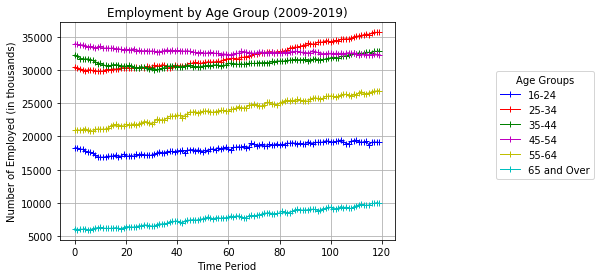

In [199]:
group_16_24 = plt.plot(job_age_df['index'], job_age_df['16-24 Age Group'], marker="+",color="blue", linewidth=1, label="16-24")
group_25_34 = plt.plot(job_age_df['index'], job_age_df['25-34 Age Group'], marker="+",color="red", linewidth=1, label="25-34")
group_35_44 = plt.plot(job_age_df['index'], job_age_df['35-44 Age Group'], marker="+",color="g", linewidth=1, label="35-44")
group_45_54 = plt.plot(job_age_df['index'], job_age_df['45-54 Age Group'], marker="+",color="m", linewidth=1, label="45-54")
group_55_64 = plt.plot(job_age_df['index'], job_age_df['55-64 Age Group'], marker="+",color="y", linewidth=1, label="55-64")
group_65_over = plt.plot(job_age_df['index'], job_age_df['65 and Over Group'], marker="+",color="c", linewidth=1, label="65 and Over")
#group_total = plt.plot(job_age_df['index'], job_age_df['Total Employment'], marker="+",color="k", linewidth=1, label="Total")
plt.title('Employment by Age Group (2009-2019)')
plt.xlabel('Time Period')
plt.ylabel('Number of Employed (in thousands)')
plt.grid()

legend = plt.legend(title='Age Groups', loc='upper center',  bbox_to_anchor=(1.45, 0.8))
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]
legend.legendHandles[4]._sizes = [30]
legend.legendHandles[5]._sizes = [30]





In [195]:
plt.savefig('employment_by_age_group.png', bbox_inches='tight')


<Figure size 432x288 with 0 Axes>